In [54]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
coustmers=pd.read_csv('Ecommerce Customers.csv')

In [4]:
coustmers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
coustmers.shape`

(500, 8)

In [90]:
coustmers.describe()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [91]:
coustmers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
#profile=ProfileReport(df, title= "coustmers", explorative= True)

In [ ]:
plt.scatter()

In [7]:
#profile.to_widgets()

first three fetures are categorical features and  have distinct values, so we remove it from our whole dataset

In [8]:
df=coustmers.drop(['Email','Address','Avatar'], axis=1)
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


find correlationship b/w all the variables in the datafarme

In [9]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


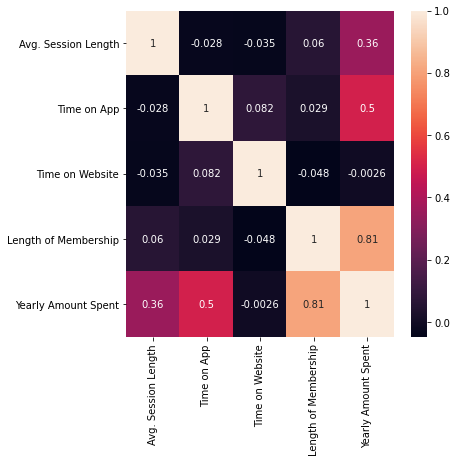

In [10]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True,)
plt.show()

In [ ]:
sns.pairplot(df)

by analysis we find that Yearly Amount Spent(Target Variable) is highly correlated with Lenght of membership, Time on App, Avg. Session Length

#  selection of ML Model

train_test_split method for dividing data into training and testing set 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Independet Variables
x=df.drop('Yearly Amount Spent', axis=1)
x.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [13]:
# dependet Variables
y=df['Yearly Amount Spent']
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [29]:
y_test

21     419.938775
239    538.774933
103    492.105052
273    640.786166
22     436.515606
          ...    
242    451.628611
141    472.992247
3      581.852344
468    553.994674
41     501.874430
Name: Yearly Amount Spent, Length: 100, dtype: float64

import linear regrssion model

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model=LinearRegression()

In [32]:
model.fit(X_train,y_train)

LinearRegression()

In [33]:

model.coef_

array([25.5548064 , 38.54617006,  0.25772337, 61.68294712])

In [34]:
cdf=pd.DataFrame(model.coef_,x.columns)
cdf

,0
Avg. Session Length,25.554806
Time on App,38.546170
Time on Website,0.257723
Length of Membership,61.682947


In [35]:
model.intercept_

-1037.4719105204656

In [36]:
Y_predicted=model.predict(X_test)

In [37]:
Y_predicted

array([420.91246078, 545.98642899, 495.05229933, 634.44533706,
       432.47448484, 459.89129036, 543.05737019, 445.04022016,
       565.25814453, 515.66389179, 531.3991583 , 497.94397788,
       598.48318243, 593.95413174, 481.60278406, 380.7780601 ,
       676.30669743, 514.59800092, 608.54149147, 438.33488674,
       478.61020716, 619.84847347, 491.81031351, 488.53086414,
       461.41155741, 481.56172655, 604.36890203, 508.3979137 ,
       601.4480688 , 500.61319379, 530.02189977, 577.3300002 ,
       507.19496265, 552.30519005, 561.25171765, 568.37940357,
       499.32809763, 449.79618695, 505.33689123, 456.84295571,
       401.01274691, 505.74845567, 528.20426457, 476.41486738,
       645.79943228, 406.81112969, 449.91251048, 605.9506145 ,
       500.94710743, 547.99269921, 702.9737767 , 487.66895263,
       395.63210764, 562.90688913, 451.34013506, 494.08208925,
       409.61899879, 423.74635976, 523.58799746, 492.98432627,
       609.113462  , 426.77601594, 551.40062604, 500.14

In [80]:
print(model.score(X_test, y_test))

0.9823780287634573


In [38]:
comperision=pd.DataFrame(Y_predicted,y_test, columns=['Predicted Prices'])

In [47]:
comperision.sort_values('Yearly Amount Spent')

,Predicted Prices
Yearly Amount Spent,
376.336901,380.778060
385.152338,384.420624
403.766902,408.835582
403.819520,401.012747
407.542168,423.746360
...,...
640.584062,645.799432
640.786166,634.445337
689.235700,676.306697


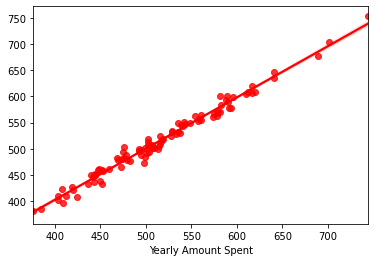

In [89]:
sns.regplot(y_test,Y_predicted, color = 'r')
plt.show()

C:\Users\Lovely\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


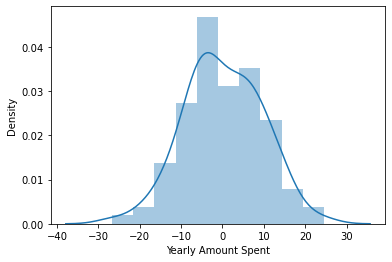

In [42]:
sns.distplot(y_test-Y_predicted)
plt.show()

# find Error

find errors by using metrics

In [48]:
from sklearn import metrics

In [50]:
metrics.mean_absolute_error(y_test,Y_predicted)

7.614890019504036

In [52]:
metrics.mean_squared_error(y_test,Y_predicted)

86.99195019878417

In [76]:
np.sqrt(metrics.mean_squared_error(y_test,Y_predicted))

9.326947528467402

# find Accuracy

In [72]:
from sklearn.metrics import accuracy_score

In [83]:
print ('accuracy =',metrics.r2_score(y_test,Y_predicted))

accuracy = 0.9823780287634573


TypeError: cannot convert the series to <class 'float'>